# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [1]:
# Answer to Q1.1
import pandas as pd
data = pd.read_csv('Dataset_Assignment1.csv')

In [2]:
# Answer to Q1.2
print("First five lines:")
print(data.head())
print("\n basic information:")
print(data.describe())
print("\n loss data:")
print(data.isnull().sum())

First five lines:
   Age Nationality  Overall  Potential               Club      Value    Wage  \
0   27    Portugal       60         71  Manchester United   94945966  216612   
1   30   Argentina       72         69         Sevilla FC  109997274  228284   
2   31     Belgium       64         69    Manchester City   71177809  201220   
3   25       Italy       68         63              Inter  120524289  302959   
4   27     Germany       64         64  FC Bayern München   84570513  275595   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves Body Type  \
0          Right                         3        3.0            2    Stocky   
1           Left                         3        3.0            3    Stocky   
2          Right                         2        5.0            3    Stocky   
3          Right                         3        3.0            2    Normal   
4          Right                         3        4.0            3    Normal   

  Position  Height  

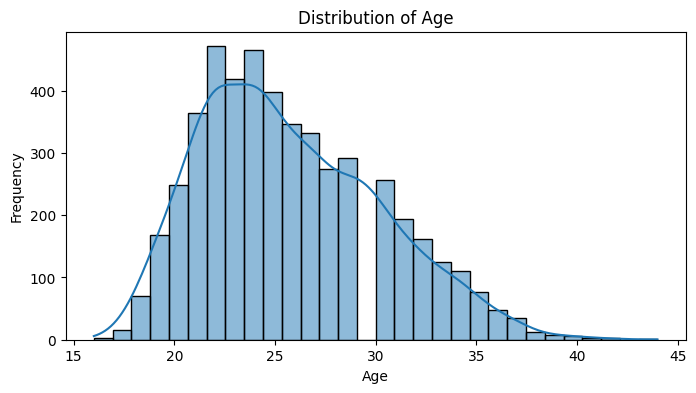

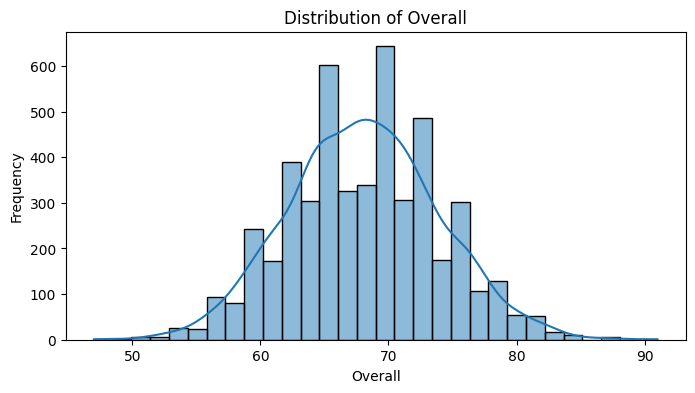

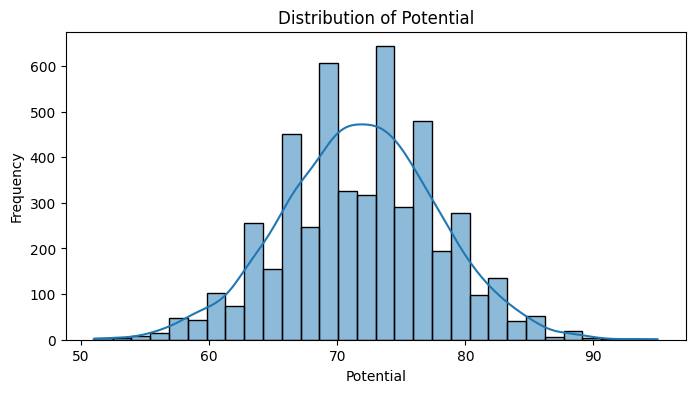

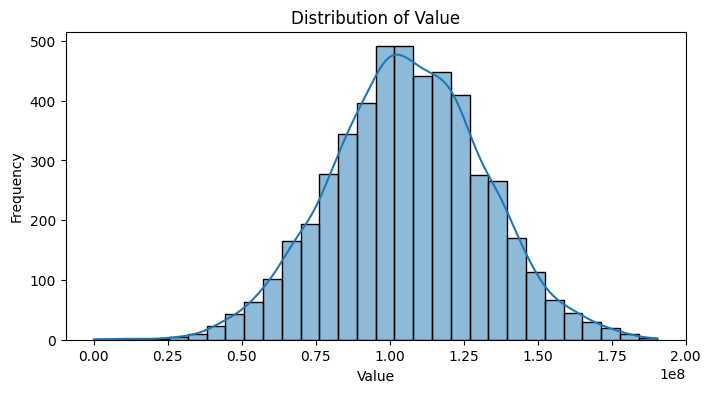

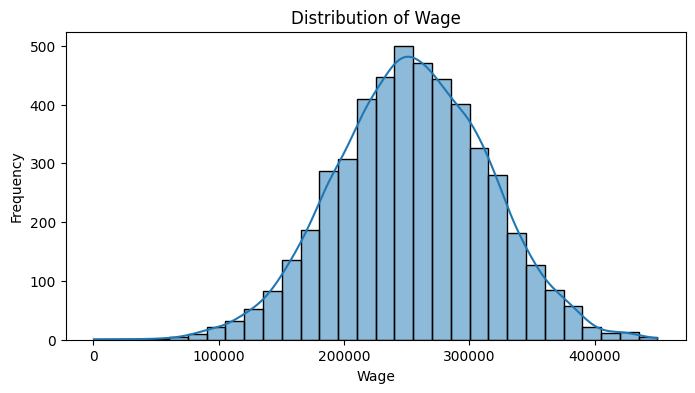

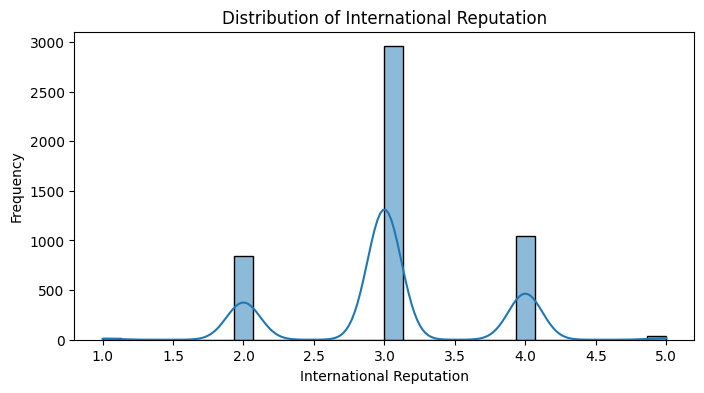

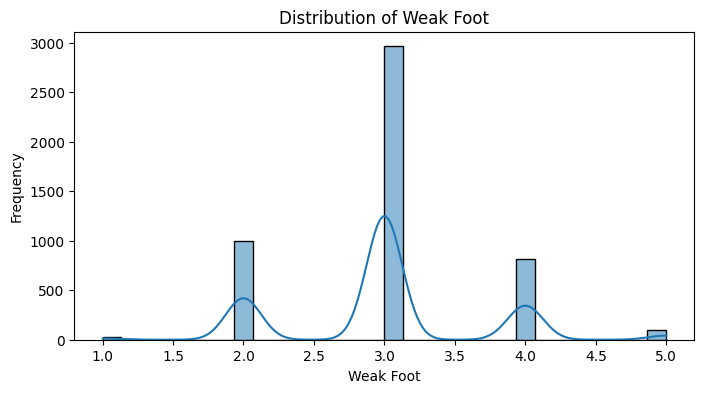

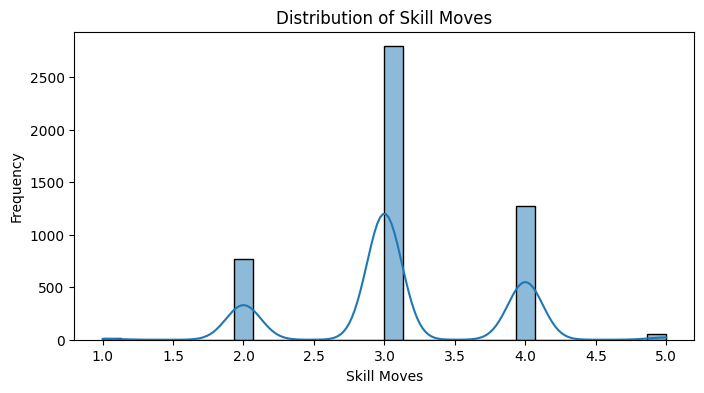

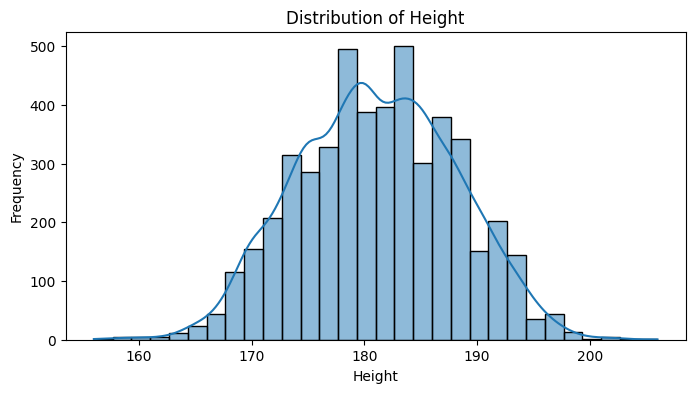

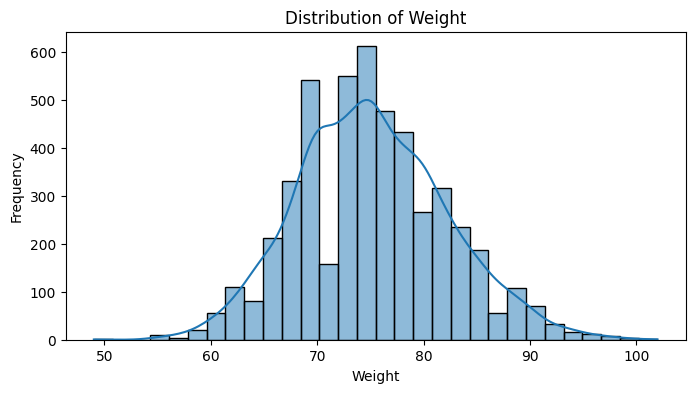

In [3]:
# Answer to Q1.3
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Answer to Q1.4**: 
1. Understand the dataset, for example the range, the type, the distribution of the data.
2. Identify potencial problems. For instance, see obvious outliers and missing data.
3. Model assumption. Through looking at the trend of data, we can know what kind of model might fit.
We can uncover missing valur, wrong data type, trends and seasonality in time-series data, outliers, imbalance in categorical variables at this stage.

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

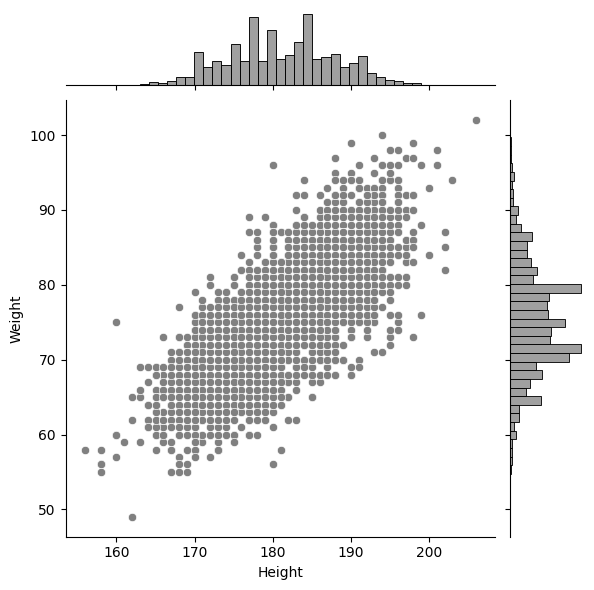

In [4]:
# Answer to Q2.1
import pandas as pd
data=pd.read_csv('Dataset_Assignment1.csv')
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(
    data=data,
    x="Height",
    y="Weight",   
    color="grey"
)
plt.show()

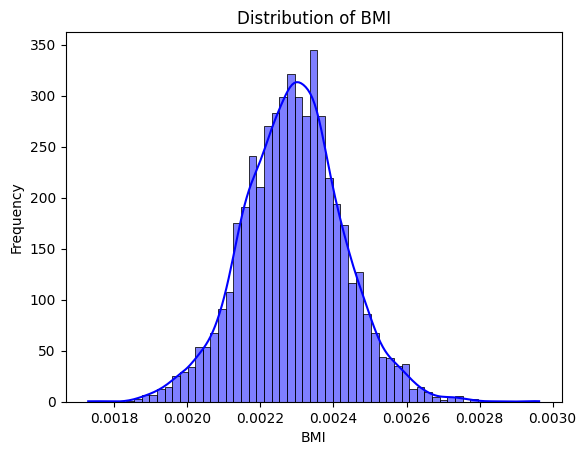

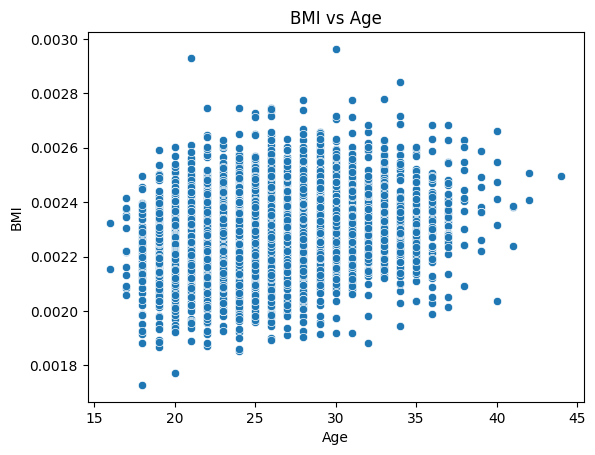

In [5]:
# Answer to Q2.2
data["BMI"]=data["Weight"]/(data["Height"]**2)
data = data.drop(columns=["Height", "Weight"])
sns.histplot(data["BMI"], kde=True, color="blue")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()
sns.scatterplot(data=data, x="Age", y="BMI")
plt.title("BMI vs Age")
plt.show()

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

In [6]:
# Answer to Q3.1
numeric_data=data.select_dtypes(include=["float64", "int64"])
corr=numeric_data.corr()
print(corr)

                               Age   Overall  Potential     Value      Wage  \
Age                       1.000000  0.024162  -0.001619 -0.008156 -0.003517   
Overall                   0.024162  1.000000   0.263119  0.450235  0.072975   
Potential                -0.001619  0.263119   1.000000  0.480819  0.122516   
Value                    -0.008156  0.450235   0.480819  1.000000  0.683851   
Wage                     -0.003517  0.072975   0.122516  0.683851  1.000000   
International Reputation -0.002439  0.054565   0.237578  0.355028  0.221551   
Weak Foot                 0.086036  0.008425  -0.025632 -0.012444 -0.021563   
Skill Moves               0.007583  0.144563   0.191678  0.154462  0.197163   
BMI                       0.235643 -0.001581   0.012047  0.016113  0.014957   

                          International Reputation  Weak Foot  Skill Moves  \
Age                                      -0.002439   0.086036     0.007583   
Overall                                   0.054565   

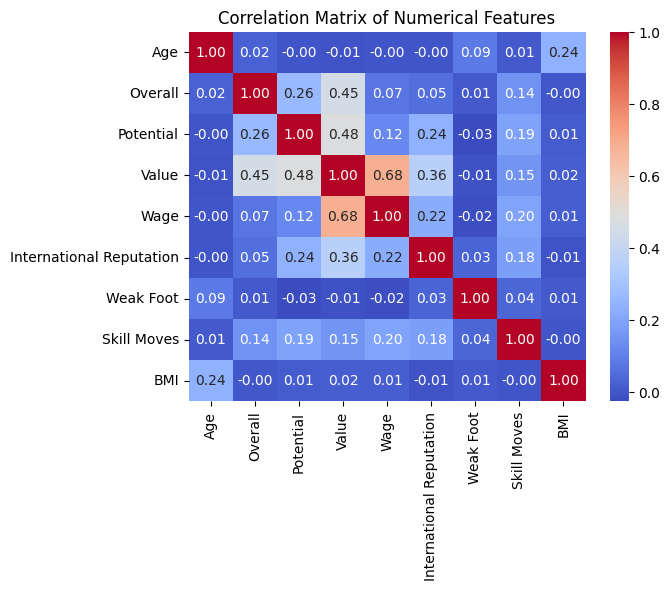

In [7]:
# Answer to Q3.2
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [8]:
# Answer to Q3.3
from sklearn.linear_model import LinearRegression
X=data[['Wage']]
y=data['Value']
model=LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Fomular: Value = {intercept:.4f} + {slope:.4f} * Wage")

Fomular: Value = 31552853.6875 + 292.8498 * Wage


**# Answer to Q3.4**: 
Correlation measures the linear relationship between two numerical variables. It indicates linear correlation. A higher correlation doesn't always mean a feature is more important. For instance, a feature could be non-linearly related to the target and its' correlation might be near 0. Moreover, correlation cannot capture multicollinearity, which means two features can be highly correlated with the target, but also highly correlated with each other. If we consider both of the features as important, the result might be unstable and cannot predict well.

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

In [9]:
# Answer to Q4.2
from sklearn.model_selection import train_test_split
X=data[['Wage']]
y=data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Answer to Q4.1
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2_non = r2_score(y_test, y_pred)
rmse_non = np.sqrt(mean_squared_error(y_test, y_pred))

In [11]:
# Answer to Q4.3
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Answer to Q4.4
model_norm=LinearRegression()
model_norm.fit(X_train_scaled, y_train)
y_pred_norm=model_norm.predict(X_test_scaled)
r2_norm = r2_score(y_test, y_pred_norm)
rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred_norm))

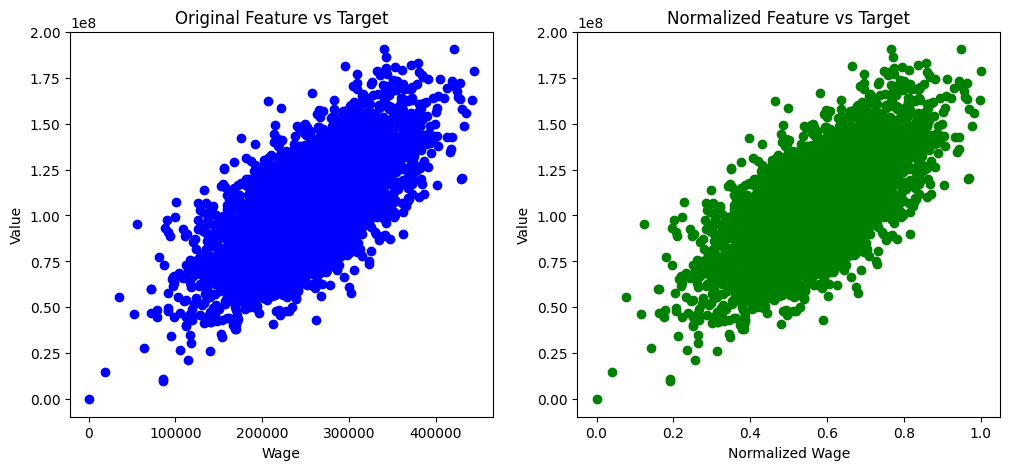

In [13]:
# Answer to Q4.5
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Wage")
plt.ylabel("Value")
plt.title("Original Feature vs Target")
plt.subplot(1,2,2)
plt.scatter(X_train_scaled, y_train, color='green')
plt.xlabel(f"Normalized {'Wage'}")
plt.ylabel("Value")
plt.title("Normalized Feature vs Target")
plt.show()

In [14]:
# Answer to Q4.6
from sklearn.metrics import mean_squared_error, r2_score
print(f"Non-normalized: R2={r2_non:.3f}, RMSE={rmse_non:.3f}")
print(f"Normalized: R2={r2_norm:.3f}, RMSE={rmse_norm:.3f}")

Non-normalized: R2=0.466, RMSE=18590761.212
Normalized: R2=0.466, RMSE=18591498.223


**# Answer to Q4.7**: 
Because it can help equalize the influence of each features, speed up convergence, stablize numerical computation.
In linear regression, scaling only changes coefficients not predictions.


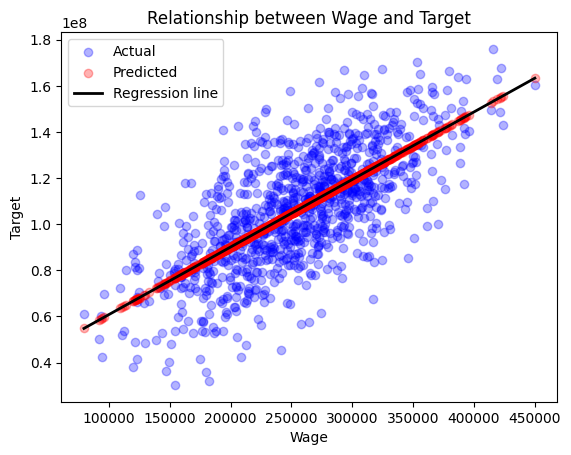

In [15]:
# Answer to Q4.8
plt.scatter(X_test, y_test, color="blue", alpha=0.3, label="Actual")
plt.scatter(X_test, y_pred, color="red", alpha=0.3, label="Predicted")
sorted_idx = np.argsort(X_test.values.flatten())
plt.plot(X_test.values.flatten()[sorted_idx],
         y_pred[sorted_idx], color="black", linewidth=2, label="Regression line")
plt.xlabel("Wage")
plt.ylabel("Target")
plt.title(f"Relationship between Wage and Target")
plt.legend()
plt.show()

**# Answer to Q4.9**: 
1. Value is not just related to wage;
2. There might be non-linearity in the relationship;
3. From the plot, we can see that the data is more like an ovel than a line, so there is some relationship that cannot be shown by just a simple linear regression.

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.2, 0.4, and 0.6).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [16]:
# Answer to Q5.1
thresholds = [0.2, 0.4, 0.6]
results = {}

In [17]:
# Answer to Q5.2
numeric_data = data.select_dtypes(include=['int64', 'float64'])
target = "Value"
corr = numeric_data.corr()[target].drop(target)
thresholds = [0.2, 0.4, 0.6]
models = {}
for t in thresholds:
    selected_features = corr[abs(corr) >= t].index.tolist()
    print(f"\nThreshold {t}: Selected features = {selected_features}")
    X = numeric_data[selected_features]
    y = numeric_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[t] = (model, X_test, y_test)
    coef_df = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
    results[t] = {"Intercept": model.intercept_, "Coefficients": coef_df}
    print(f"Intercept = {model.intercept_:.4f}")
    print(coef_df)


Threshold 0.2: Selected features = ['Overall', 'Potential', 'Wage', 'International Reputation']
Intercept = -162175699.3419
                    Feature   Coefficient
0                   Overall  1.435524e+06
1                 Potential  1.248496e+06
2                      Wage  2.543783e+02
3  International Reputation  5.319066e+06

Threshold 0.4: Selected features = ['Overall', 'Potential', 'Wage']
Intercept = -157564180.5988
     Feature   Coefficient
0    Overall  1.432083e+06
1  Potential  1.373165e+06
2       Wage  2.654595e+02

Threshold 0.6: Selected features = ['Wage']
Intercept = 31359952.5099
  Feature  Coefficient
0    Wage   293.692046


In [18]:
# Answer to Q5.3
for t, (model, X_test, y_test) in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    print(f"Threshold {t}: R²={r2:.3f}, RMSE={rmse:.3f}")

Threshold 0.2: R²=0.715, RMSE=13585924.818
Threshold 0.4: R²=0.695, RMSE=14060756.445
Threshold 0.6: R²=0.466, RMSE=18591498.223


**# Answer to Q5.4**: 
R² means how much the model can explain, so the closer to 1 the better. RMSE indicates the difference between real data and predicted data, so the closer to 0 the better. From these two aspects, the model performs best when threshold is 0.2. 
If too many features were used, it may cause overfitting, which means the model performs very well in training, but when it comes to other data, the model cannot perform well. Moreover, it may also cause multicollinearity and increase of computational cost.

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [19]:
# Answer to Q6.1
print(f"simple regression model: \nR2={r2_non:.3f}, RMSE={rmse_non:.3f}")
for t, (model, X_test, y_test) in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    print(f"Threshold {t}:  \nR²={r2:.3f}, RMSE={rmse:.3f}")

simple regression model: 
R2=0.466, RMSE=18590761.212
Threshold 0.2:  
R²=0.715, RMSE=13585924.818
Threshold 0.4:  
R²=0.695, RMSE=14060756.445
Threshold 0.6:  
R²=0.466, RMSE=18591498.223


**Answer to Q6.2**: 
The model with threshold of 0.2 performs best. Because it has the largest R² and the least RMSE, which means the model can explain the most of the dataset and its' estimation correction is the highest.

**Answer to Q6.3**: 
The model captures the general trend of the data well but the absolute prediction errors are large. This might be because scales of the target variable is large, which will result in a small error will make RMSE large. Also there might be outliers in data. 

**Answer to Q6.4**: 
1. Check multicollinearity
2. Try non-linear models
3. Do cross-validation
4. Try scaling targets

# Q7 - GenAI

1. **Discussion Question:** Did you use GenAI and if so, how?
2. **Discussion Question:** What limitations did you encounter and how did you overcome them?

**Answer to Q7.1**: 
Yse. I used AI to help assist me to install jupyter notebook and reinstall the right version of Python.

**Answer to Q7.2**: 
I forgot what packages that are needed, so I looked at tutorial material and searched online for help.